In [2]:
#這裡示範分群(假設知道有三群,但不知道答案)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#因為不知道答案,所以不放train_test_split > 不知道答案所以不能驗證
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3) #先定義方法,這裡調整KMeans參數,n_clusters代表分幾群 #其他參數：Kmeans++ 初始中心選遠一點,避免三個點太近 #max_iter 跑幾次? #tol 圓心變化沒超過這個範圍
cluster.fit(iris["data"]) #這裡再實做計算

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
df["label"] = cluster.labels_ #labels是每個點被打上的標註
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [5]:
cluster.cluster_centers_ #是一個真正中心,但是是虛擬的圓心,並不在150筆中的哪個 #每次的迭代法答案可能不同(最佳解的圓心可能會有變化),但差異不大

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [6]:
#來做驗證
from sklearn.metrics import silhouette_score
for testk in range(2, 20): #設定分2群開始~跑到分19群結束
    testc = KMeans(n_clusters=testk) 
    testc.fit(iris["data"])
    s = silhouette_score(iris["data"], testc.labels_) #跑預測機率
    print(testk, ":", s)

2 : 0.681046169211746
3 : 0.5528190123564091
4 : 0.49745518901737446
5 : 0.4887488870931048
6 : 0.3648340039670018
7 : 0.3452178646369988
8 : 0.35974549238457515
9 : 0.33754182245944175
10 : 0.33446949685607724
11 : 0.31010773649026474
12 : 0.28572929837621475
13 : 0.30094331742123026
14 : 0.2840783081865325
15 : 0.283950683669102
16 : 0.31201396156184297
17 : 0.2820140729748771
18 : 0.28571156207925846
19 : 0.29380675926252897


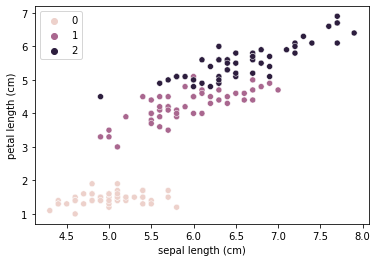

In [7]:
#這裡是跑分布畫圖出來,但是有先作弊1.沒有降維>直接只畫其中兩個數字pl&sl 2.把答案target直接標註上色
#實務上要降維
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df["sepal length (cm)"],
        y=df["petal length (cm)"],
        hue=iris["target"])
#hue的參數是用顏色標註分組
#由這個圖我們可以看出：
#1.預測成功率最高的的確是分兩群：下面黃色一群、上面紫色+粉色一群 ， 統計上是提供建議>分兩群 ， 但人為發現&判斷要分三群
#2.可以看出黃色最容易被分辨出來，所以先前使用決策樹做分類的時候，第一個條件一定是把黃色切出來
#3.為什麼要前剪枝?不做到最深的學習，可以看到紫色和粉色有部分的重疊，如果學習到兩種重疊的極端案例，反而會分辨不出來，為了學習其中一個而錯了其他的

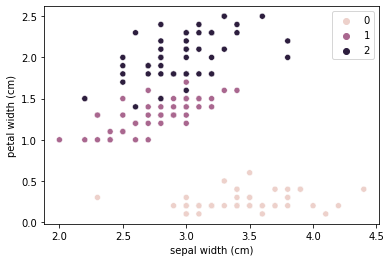

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df["sepal width (cm)"],
        y=df["petal width (cm)"],
        hue=iris["target"])
#這裡取另外兩個值來做畫圖，可以看到分布的方式是差不多的>大約是分布兩群